In [2]:
import matplotlib.pyplot as plt
import pydicom
import os
import numpy as np

In [3]:
def mean_pixel_and_slice_location(dataset):
    mean_pixel = np.mean(dataset.pixel_array)
    slice_location = dataset.get('SliceLocation', "(missing)")
    return (mean_pixel, slice_location)

In [4]:
def remove_DSStore(outer_file):
    for inner_file in outer_file:
        if inner_file == '.DS_Store':
            outer_file.remove(inner_file)

In [5]:
os.getcwd()

'/Users/theocohen/Desktop/UNI/4THYR/MPHYS2'

In [6]:
path = os.path.abspath('LUNG CT/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-69331/0-82046/000063.dcm')

In [7]:
dataset = pydicom.dcmread(path)

Slice location: -369.5
Mean pixel value: 290.7711639404297


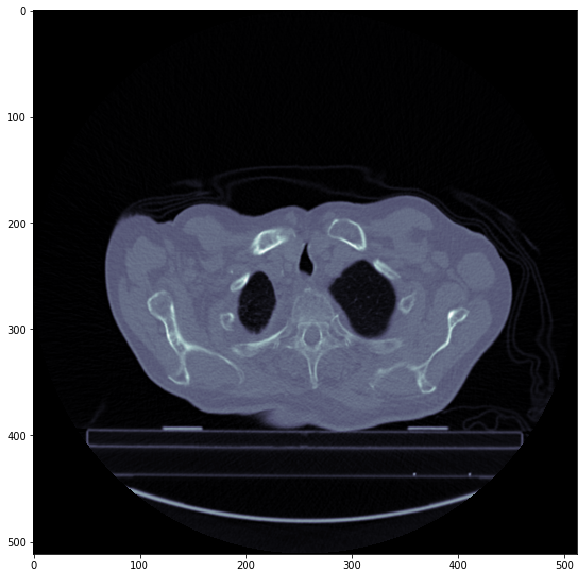

In [8]:
print("Slice location:", dataset.get('SliceLocation', "(missing)"))
print("Mean pixel value:", np.mean(dataset.pixel_array))

plt.figure(figsize=(10,10))
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()

In [9]:
pixel_array = dataset.pixel_array

In [10]:
from skimage import filters
threshold_value = filters.threshold_otsu(pixel_array)
# Find threshold value for separating foreground and background using Otsu thresholding

In [11]:
threshold_value

539

In [12]:
threshold_array = np.full(pixel_array.shape, threshold_value)
bool_array = np.greater(pixel_array, threshold_array)
# Create boolean array of pixel array values compared to threshold value to display binary image
# of foreground and background

In [1]:
plt.figure(figsize=(10,10))
plt.imshow(bool_array, cmap='gray', interpolation='nearest')
plt.savefig('/Users/theocohen/Desktop/UNI/4THYR/MPHYS2/PRINT/bool_plot')
# Display binary plot

NameError: name 'plt' is not defined

In [14]:
from skimage import measure
labels = measure.label(bool_array,background=1)
# Label each connected component of binary image and create new label array

In [15]:
import sys
np.set_printoptions(threshold=sys.maxsize)

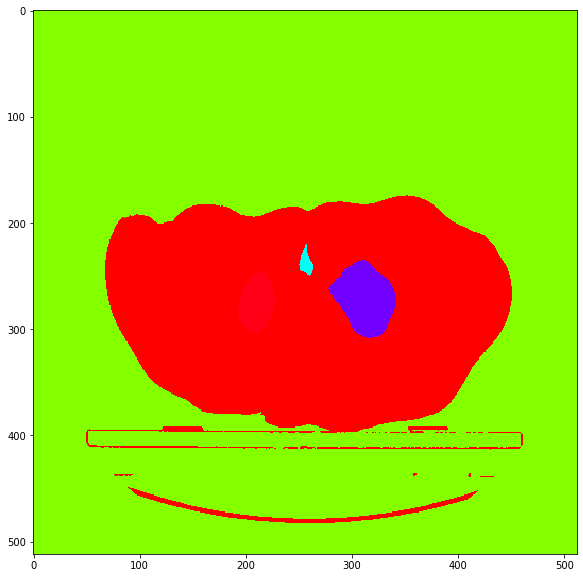

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(labels, cmap='hsv')
plt.savefig('/Users/theocohen/Desktop/UNI/4THYR/MPHYS2/PRINT/labels_plot')
# Plot connected components with labels coloured differently

In [45]:
#labels

In [18]:
counts = np.bincount(labels.flatten())  
# Count number of occurences of each label in label array

In [26]:
background_label = np.argmax(counts)
background_label
# Identify the label number of the background as the bin containing the greatest number

1

In [20]:
pixel_array_normalized = pixel_array / pixel_array.max()
# Normalize pixel array between 0 and 1

In [56]:
black_counter = 0
flat_labels = labels.flatten()
flat_pixel_array_normalized = pixel_array_normalized.flatten()
#for labels_index, value in enumerate(flat_labels):
#    if value == background_label:
#        continue
#    elif 0 <= flat_pixel_array_normalized[labels_index] <= 0.12:
#        black_counter+=1

# Count number of black pixels other than those in background

In [57]:
flat_pixel_array_normalized_minus_background = flat_pixel_array_normalized[flat_labels != background_label]
# Removes the background of the CT scan
# Flattened array of grey scale CT scan left

In [58]:
no_background_threshold_value = filters.threshold_otsu(flat_pixel_array_normalized_minus_background)


In [59]:
no_background_threshold_value

0.283203125

In [60]:
filters.threshold_otsu(pixel_array_normalized)

0.228515625

In [61]:
less_than_threshold_value=flat_pixel_array_normalized_minus_background[flat_pixel_array_normalized_minus_background<=no_background_threshold_value]


In [62]:
len(less_than_threshold_value)


6357